In [3]:
from scipy.integrate import odeint
import numpy as np

def calc_suspectible(suspectible, infected, time):
    return  -(0.33*infected) * (suspectible /(suspectible + infected))


def calc_infected(infected, suspectible, time):
    return (0.33*infected) * (suspectible / (suspectible + infected))


timevec = np.linspace(0,10,100)

suspectible = odeint(calc_suspectible, y0=(4300000,88), t=timevec)
infected = odeint(calc_infected, y0=(88, 4300000), t=timevec)



TypeError: calc_suspectible() missing 1 required positional argument: 'time'

In [6]:
from scipy.integrate import odeint
import numpy as np

def calc_infected(infected,time):
    return ((0.33 * infected) * (4300000/(4300000+infected)))

time_vec = np.linspace(0,10,1000)

infected = odeint(calc_infected, y0=88, t=time_vec)

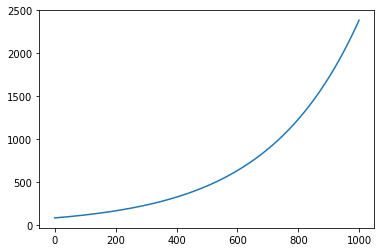

In [9]:
import matplotlib.pyplot as plt


plt.figure()
plt.plot(infected)

In [1]:
#constants
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


fat_without = 0.4
t_fat_without = 0.9
t_rec_without = 2.5

fat_with = 0.35
t_fat_with = 1
t_rec_with = 1.56


safe_b_rate = 0.73

#constant for now
ETC_cap = 50


def calc_population(y,t):
    suspectible, infected, recovered, deceased, funeral, treated = y
    
    dsdt = -(0.33*infected + 0.68*deceased) * (suspectible /(suspectible + infected))

    drdt = (((1-fat_without)*infected) / t_rec_without
            + (1-fat_with)*treated / t_rec_with)
    
    if(treated < 50):
        dtrdt = min(ETC_cap - treated, infected) -(1-fat_with)*treated / t_rec_with - fat_with*treated / t_fat_with 
        didt = ((0.33*infected + 0.68*deceased) * (suspectible /(suspectible + infected))
            - (fat_without*infected) / t_rec_without
           - (fat_without)*infected / t_fat_without
            - min(ETC_cap - treated, infected))
    else:
        dtrdt = -(1-fat_with)*treated / t_rec_with - fat_with*treated / t_fat_with 
        didt = ((0.33*infected + 0.68*deceased) * (suspectible /(suspectible + infected))
            - (fat_without*infected) / t_rec_without
           - (fat_without)*infected / t_fat_without)
        
    dddt = ((fat_without)*infected / t_fat_without 
            - deceased * 0.73
            + fat_with*treated / t_fat_with)
    
    dfdt = deceased * 0.73
    
    
    dydt = [dsdt, didt, drdt, dddt, dfdt, dtrdt]
    return dydt  
                                                                                          
time_vec = np.linspace(0,10,100)
y0 = [4300000, 88, 0, 0, 0, 0]  
                                                                                          
population = odeint(calc_population, y0, t=time_vec)


fig, axs = plt.subplots(6, 1)

axs[0].plot(population[:,0])
axs[0].set_title("Suspectible")

axs[1].plot(population[:,1])
axs[1].set_title("Infected")

axs[2].plot(population[:,2])
axs[2].set_title("Recovered")

axs[3].plot(population[:,3])
axs[3].set_title("Deceased")

axs[4].plot(population[:,4])
axs[4].set_title("Funeral")

axs[5].plot(population[:,5])
axs[5].set_title("Treated")
                                 

Text(0.5,1,'Treated')

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def calc_population(y,t, fat_without, t_fat_without, t_rec_without, fat_with, t_fat_with, t_rec_with, ETC_cap):
    suspectible, infected, recovered, deceased, funeral, treated = y
    
    dsdt = -(0.33*infected + 0.68*deceased) * (suspectible /(suspectible + infected))

    drdt = (((1-fat_without)*infected) / t_rec_without
            + (1-fat_with)*treated / t_rec_with)
    
    if(treated < 50):
        dtrdt = min(ETC_cap - treated, infected) -(1-fat_with)*treated / t_rec_with - fat_with*treated / t_fat_with 
        didt = ((0.33*infected + 0.68*deceased) * (suspectible /(suspectible + infected))
            - (fat_without*infected) / t_rec_without
           - (fat_without)*infected / t_fat_without
            - min(ETC_cap - treated, infected))
    else:
        dtrdt = -(1-fat_with)*treated / t_rec_with - fat_with*treated / t_fat_with 
        didt = ((0.33*infected + 0.68*deceased) * (suspectible /(suspectible + infected))
            - (fat_without*infected) / t_rec_without
           - (fat_without)*infected / t_fat_without)
        
    dddt = ((fat_without)*infected / t_fat_without 
            - deceased * 0.73
            + fat_with*treated / t_fat_with)
    
    dfdt = deceased * 0.73
    
    
    dydt = [dsdt, didt, drdt, dddt, dfdt, dtrdt]
    return dydt




def ebola_model(fat_without = 0.4,
               t_fat_without = 0.9,
               t_rec_without = 2.5,
               fat_with = 0.35,
               t_fat_with =1,
               t_rec_with = 1.56,
               safe_b_rate =0.73,
               ETC_cap = 50):
    
    time_vec = np.linspace(0,10,100)
    y0 = [4300000, 88, 0, 0, 0, 0]  
                                                                                          
    population = odeint(calc_population, y0, t=time_vec, args=(fat_without, t_fat_without, t_rec_without, fat_with, t_fat_with, t_rec_with, ETC_cap))
    
    S, I, R, D, F, T = population.T
    
    return S,I,R,D,F,T

In [2]:
from ema_workbench import Model, RealParameter, TimeSeriesOutcome

model = Model('Ebola', function=ebola_model)

model.uncertainties = [RealParameter('fat_without', 0.4, 0.7)]

model.outcomes = [TimeSeriesOutcome('S'),
                  TimeSeriesOutcome('I'),
                  TimeSeriesOutcome('R'),
                  TimeSeriesOutcome('D'),
                  TimeSeriesOutcome('F'),
                  TimeSeriesOutcome('T')]


C:\Users\Emma\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


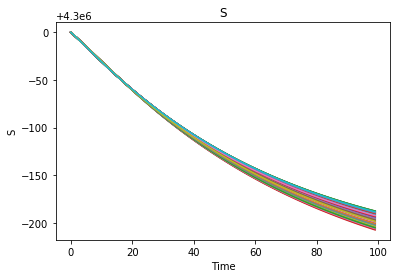

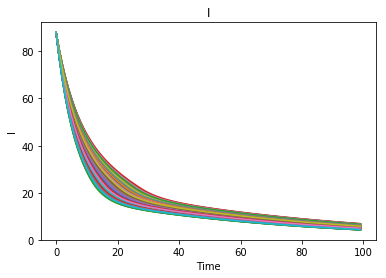

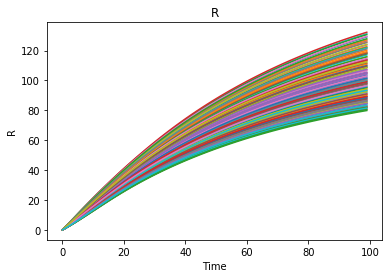

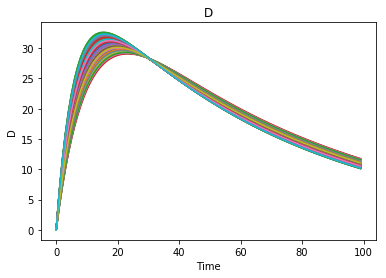

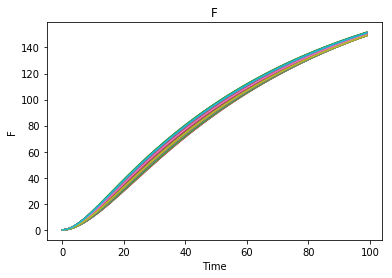

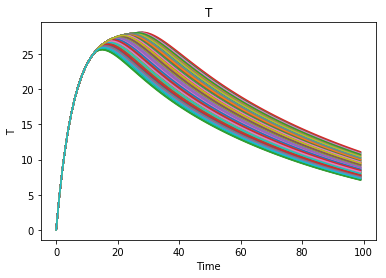

In [3]:
from ema_workbench import SequentialEvaluator

with SequentialEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=100)
    
from ema_workbench.analysis import plotting, plotting_util

for outcome in outcomes.keys():
    plotting.lines((experiments, outcomes), outcomes_to_show=outcome, 
                   density=False)
plt.show()